___

<a href='https://mainacademy.ua/'> <img src='https://mainacademy.ua/wp-content/uploads/2019/03/logo-main.png' alt = 'Хмм, щось з інтернетом'/></a>
___

# Module 7: Supervised learning

## Lab work 7



#### Мета: 

* навчитися використовувати моделі з учителем

### Завдання 1:

Для цього завдання ми будемо вивчати загальнодоступні дані з [LendingClub.com](www.lendingclub.com). 

Кредитний клуб пов'язує людей, яким потрібні гроші (позичальники), та людей, які мають гроші (інвесторів). Сподіваємось, як інвестор ви хотіли б інвестувати в людей, які продемонстрували, що вони мають високу ймовірність повернути вам гроші. Ми спробуємо створити модель, яка допоможе це передбачити.

Кредитний клуб мав [дуже цікавий 2016 рік](https://en.wikipedia.org/wiki/Lending_Club#2016), тож давайте перевіримо деякі їх дані.

Ми використовуватимемо дані про позики за 2007-2010 роки та намагатимемося класифікувати та прогнозувати, чи повертав позичальник їх повністю.

Ось що представляють стовпці:
* `credit.policy`: 1, якщо клієнт відповідає критеріям андеррайтингу кредитів LendingClub.com, і 0 в іншому випадку.

* `purpose`: мета позики (приймає значення "кредитна_карта", "консолідація боргу", "освітня", "основна_покупка", "малий бізнес" та "всі_інші").

* `int.rate`: процентна ставка позики, пропорційно (ставка 11% зберігатиметься як 0,11). Позичальникам, які LendingClub.com вважає більш ризикованими, призначаються вищі процентні ставки.

* `installment`: щомісячні виплати позичальника, якщо позика фінансується.

* `log.annual.inc`: журнал річного доходу позичальника, який самостійно звітується.

* `dti`: відношення боргу до доходу позичальника (сума боргу, поділена на річний дохід).

* `fico`: кредитний рейтинг позичальника FICO.

* `days.with.cr.line`: кількість днів, коли позичальник мав кредитну лінію.

* `revol.bal`: кредитний залишок позичальника (сума не виплачена в кінці циклу виставлення рахунків за кредитною карткою).

* `revol.util`: коефіцієнт використання кридитної лінії позичальника (сума використаної кредитної лінії відносно загальної кількості доступних кредитів).

* `inq.last.6mths`: кількість запитів позичальників з боку кредиторів за останні 6 місяців.

* `delinq.2yrs`: кількість разів, протягом яких позичальник прострочував платежі протягом останніх 2 років понад 30 днів.

* `pub.rec`: кількість публічних записів (заяви про банкрутство, податкова застава або рішення).

Алгоритм виконання та проміжні завдання:
1. Відкрийте файл та виведіть описову статистику

2. Створіть дві гістограми по полю fico (перша для значень not.fully.paid=0, друга = 1). Гістограми накладіть одна на одну.

3. Відобразіть тенденцію між оцінкою fico та int.rate. Використайте jointplot

4. Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

5. purpose є категорієї, тому варто перетворити за допомогою pd.get_dummies

6. Розбийте датасет на тестві та трейнові дані

7. Використайте для задачі класифікації такі моделі: дерево рішень, логістична регресія, random forest, XGBoost

8. Для кожної з моделей виведіть матрицю, основні метрики

8. *Використейте бібіотеку dtreeviz для візуалізації (там, де актуально)

9. Використайте ансамбель voting для всіх моделей

10. Порівняйте результати моделей та зробіть висновки

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


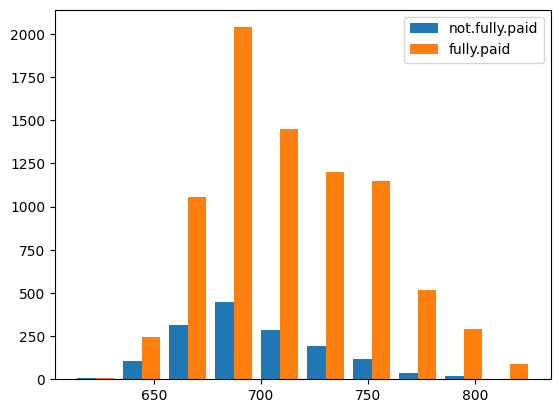

In [4]:

x1 = df.loc[df['not.fully.paid'] > 0, 'fico']
x2 = df.loc[df['not.fully.paid'] == 0, 'fico']

plt.hist([x1, x2], label=['not.fully.paid', 'fully.paid'])
plt.legend(loc='upper right')

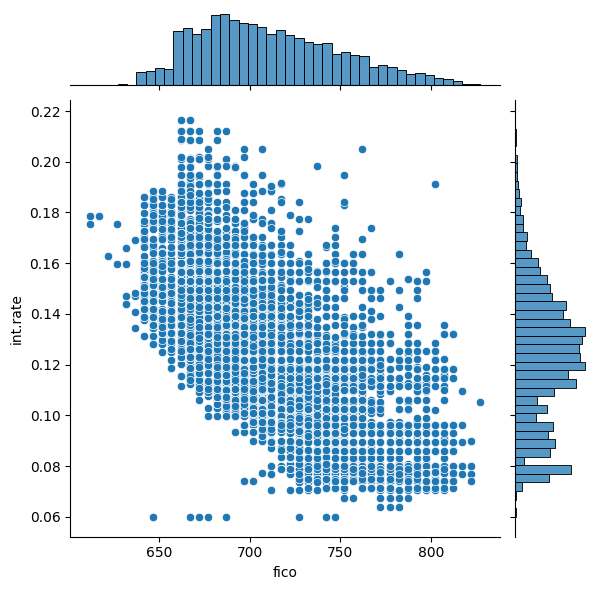

In [5]:

sns.jointplot(x='fico', y='int.rate', data=df)

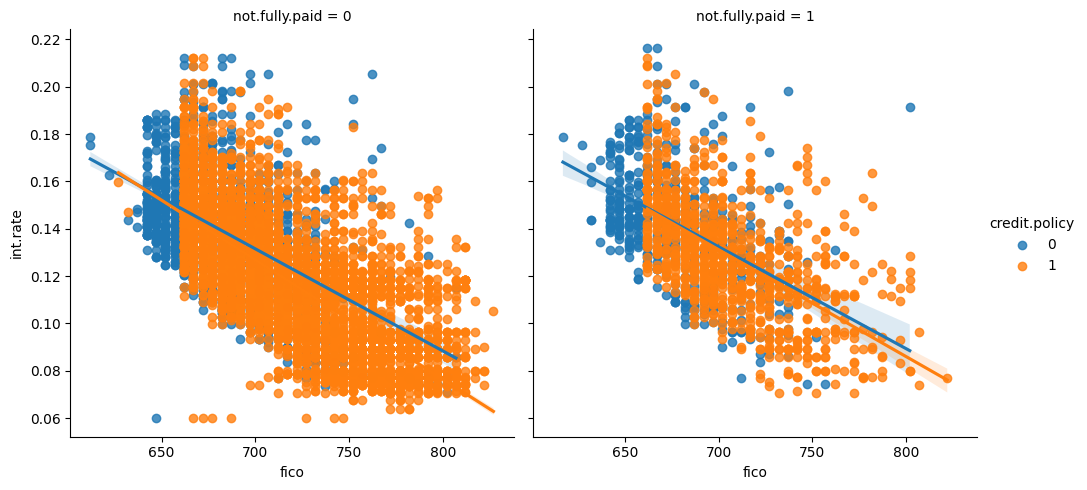

In [6]:
#  Побудуйте графік lmplot на основі int.rate та fico. Коліром розідліть по полю credit.policy. Розбийте по значеннях цільової функції

sns.lmplot(x='fico', y='int.rate', data=df, hue='credit.policy', col='not.fully.paid')

### Machine Leaning Predictions

In [16]:
import pandas as pd

df = pd.read_csv('loan_data.csv')
df = pd.get_dummies(df, columns=['purpose'], drop_first=True)
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

In [8]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

def result(y_test, y_pred, model):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    return { 
        "model_name": model if type(model) == str else type(model).__name__,
        "accuracy": accuracy, 
        "precision": precision, 
        "recall": recall, 
        "f1": f1, 
    }


In [9]:
from sklearn.model_selection import train_test_split


def create_model(model, X, y, **params):
    default_params = { "test_size": .3 } if not params else params
    X_train, X_test, y_train, y_test = train_test_split(X, y, **default_params)

    y_pred = model.fit(X_train, y_train).predict(X_test)

    return { "y_test": y_test, "y_pred": y_pred, "model": model }


### Evaluating Ml models

In [17]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

results = []

logistic_regression = create_model(LogisticRegression(max_iter=1000), X, y, random_state=42, test_size=.25)
decision_tree = create_model(DecisionTreeClassifier(), X, y, random_state=42, test_size=.25)
random_forest = create_model(RandomForestClassifier(max_depth=5), X, y, random_state=42, test_size=.25)
xgboost = create_model(XGBClassifier(n_estimators=2, max_depth=6, learning_rate=1, objective='binary:logistic'), X, y, random_state=42, test_size=.25)

estimators = ([
    ('LogisticRegression', logistic_regression["model"]),
    ('DecisionTreeClassifier', decision_tree["model"]),
    ('RandomForestClassifier', random_forest["model"]),
    ('XGBClassifier', xgboost["model"])
])

soft_voting = create_model(VotingClassifier(estimators=estimators, voting="soft"), X, y)
hard_voting = create_model(VotingClassifier(estimators=estimators, voting="hard"), X, y)

results.append(result(**logistic_regression))
results.append(result(**decision_tree))
results.append(result(**random_forest))
results.append(result(**xgboost))

soft_voting["model"] = "Soft Voting"
results.append(result(**soft_voting))

hard_voting["model"] = "Hard Voting"
results.append(result(**hard_voting))

models_results = pd.DataFrame(results).sort_values(by=['f1'], ascending=False).reset_index(drop=True)

models_results


,model_name,accuracy,precision,recall,f1
0,XGBClassifier,0.828810,0.760223,0.828810,0.776743
1,LogisticRegression,0.840084,0.787378,0.840084,0.772481
2,Soft Voting,0.834377,0.775785,0.834377,0.771337
3,RandomForestClassifier,0.840084,0.705740,0.840084,0.767074
4,Hard Voting,0.833333,0.861140,0.833333,0.758615
5,DecisionTreeClassifier,0.735699,0.748806,0.735699,0.742016


In [ ]:
import dtreeviz

viz_model = dtreeviz.model(decision_tree,
                           X_train=X, y_train=y,
                           feature_names=X.columns,
                           target_name='loans')

v = viz_model.view()     # render as SVG into internal object 
v.show()                 # pop up window
v.save("./loans_decision_tree.svg")  # optionally save as svg

### Завдання 2:

Просте завдання на обробку часових рядів.

Потрібно вивести наступну інформацію: 
1. Виведіть список унікальних міст з датасету
2. Виведіть дату початку та кінця ведення даних
3. Яка середня конценрація $NO_2$ для кожного дня тижня і міста (виведіть таблицю)?
4. Яке середнє значення для кожної години (виведіть стовбчикову діаграму)?

In [7]:
url = "https://raw.githubusercontent.com/dm-fedorov/pandas_basic/master/%D0%B1%D1%8B%D1%81%D1%82%D1%80%D0%BE%D0%B5%20%D0%B2%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20pandas/data/air_quality_no2_long.csv"

Uniq cities:  ['Paris' 'Antwerpen' 'London']
Date start:  2019-05-07 01:00:00+00:00
Date end:  2019-06-21 00:00:00+00:00


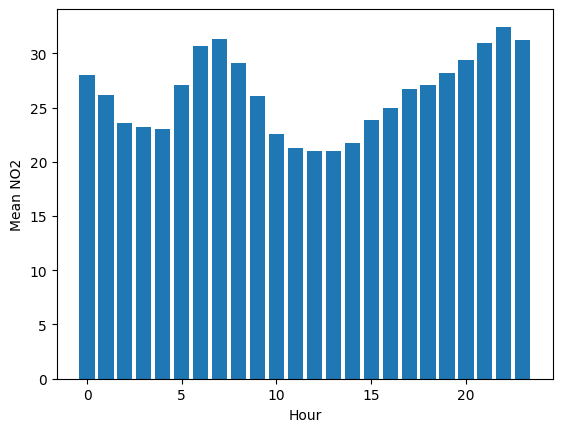

In [201]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('air_quality_n2.csv')

unique_cities = df['city'].unique()
print("Uniq cities: ", unique_cities)

start_date = df['date.utc'].min()
end_date = df['date.utc'].max()
print("Date start: ", start_date)
print("Date end: ", end_date)

df['date'] = pd.to_datetime(df['date.utc']).dt.date
df['day_of_week'] = pd.to_datetime(df['date.utc']).dt.day_name()
result = df.groupby(['city', 'day_of_week', 'date'])['value'].mean().reset_index()
result.to_csv('./no2_table.csv')

df['hour'] = pd.to_datetime(df['date.utc']).dt.hour
hourly_mean = df.groupby('hour')['value'].mean().reset_index()
plt.bar(hourly_mean['hour'], hourly_mean['value'])
plt.xlabel('Hour')
plt.ylabel('Mean NO2')
plt.show()
